# Lab 4 

In this lab, we will be faced with a regression problem. We have to guess the age of abalone(a type of marine snail) based on other given data. 

In [97]:
import numpy as np
import pandas as pd

data = pd.read_csv('abalone.data',sep = ' ')

In [98]:
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age(rings)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [99]:
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age(rings)
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [100]:
data.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'age(rings)'],
      dtype='object')

## Data Exploration


In regression analysis, the visualization plays a huge part in the steps ahead, more than classification, because ultimately the labels will be an unbound numerical value. In classification, there will be a finite number of different classes/labels. In regression, however, the output can be any numerical value. 

### Task 1: Numerical variable analysis

Correlation plays a huge part in deciding the output of a regression problem. The more correlated a variable is to the target variable, the more important it is as a feature for training the model. 

Q1. Create a scatter plot with a linearly regressive line between length and age(rings).

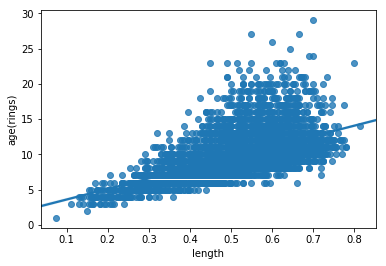

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
#TODO
sns.regplot(x = "length",y = "age(rings)",data = data)
plt.show()

Q2. Create a scatter plot with a polynomial best fit line of order 2 between whole_weight and age(rings).

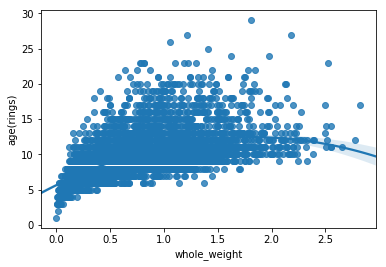

In [102]:
#TODO
sns.regplot(x="whole_weight",y="age(rings)",data=data,order=2)
plt.show()

Q3. Create a diagonal correlation heatmap, with the correlation method being Kendall rank correlation, and ensure that the correlation values are annotated on the heatmap.

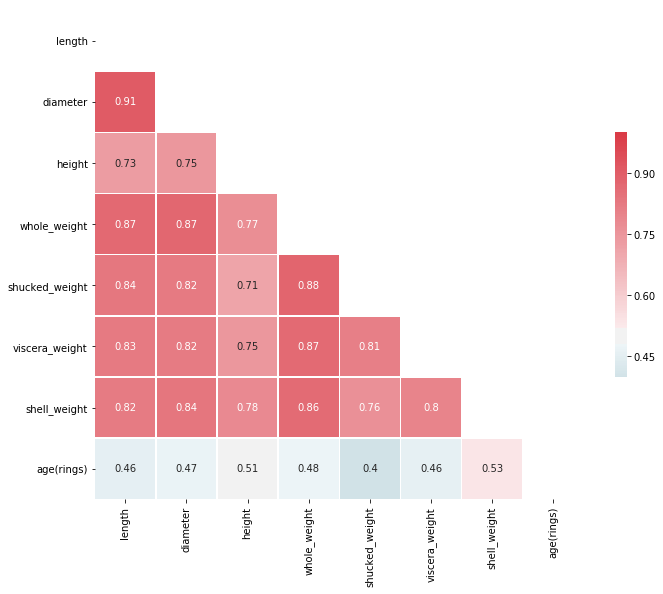

In [103]:
# Compute the correlation matrix
corr = data.corr(method="kendall")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

plt.show()

Q4. Create a FacetGrid which shows two scatterplots between diameter and age(rings), one for each sex.

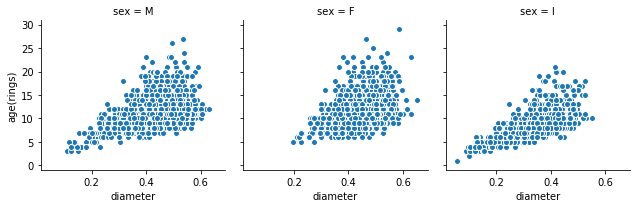

In [104]:
#TODO
g = sns.FacetGrid(data=data,  col="sex")
g = g.map(plt.scatter, "diameter", "age(rings)", edgecolor="w")
plt.show()

Q5. Feel free to try out other visualizations.

In [105]:
df = pd.get_dummies(columns=["sex"],data=data)

## Feature Engineering 

Using all features in a problem like this increases dimensionality, which not only makes computation slow, but can prevent the model reaching peak performance.

### Task 2: Feature Selection

Q6. Select an appropriate number of features for the training data, and assign it to variables. In case you want to use categorical data, remember to one-hot encode. 

In [106]:
#TODO


df_tr = df
df_tr

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age(rings),sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,0,1,0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,1,0,0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,1,0,0
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,0,0,1
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19,1,0,0


### Task 3:Feature Scaling

Q7. Do the necessary scaling on the data.

In [107]:
#TODO
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
m.fit_transform(df_tr)
X = df_tr.drop(['age(rings)'],axis=1)
y = data['age(rings)'].tolist()

## Model Selection and Training

Q8. Split training and testing set.

In [108]:
#TODO
X.shape
split = int(0.75*X.shape[0])
tr_X = X[:split]
tr_Y = y[:split]
te_x = X[split:]
te_Y = y[split:]

### Task 4: Defining Performance Metrics

It must be remembered that different types of machine learning problems carry different evaluations metrics. Therefore for regression, we cannot have metrics like precision and accuracy, which belong to classification tasks, to evaluate a model. We will analyze our model with 3 metrics: Root mean squared error, R2-score(coefficient of determination), and explained variance score.

Q9. Complete the function below, which returns the above mentioned metrics. Import the necessary tools via scikit-learn

In [109]:
#TODO

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

def performance_metrics(y_true,y_pred):
    rmse = mean_absolute_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    explained_var_score = explained_variance_score(y_true,y_pred)
    
    return rmse,r2,explained_var_score



### Task 5: Model Selection

Finally, we select a model and train it. One note to keep in mind, now that we are working on a regression problem, remember that we will be using Regressors, not Classifiers. 

Q10. Instantiate any Regressor, such as DecisionTreeRegressor, and train it on the training data.

In [110]:
#TODO
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(100,200,300,400,300,200,100),verbose = True)
reg.fit(X=tr_X,y=tr_Y)
y_reg = reg.predict(tr_X)

Iteration 1, loss = 28.89646255
Iteration 2, loss = 5.10007875
Iteration 3, loss = 3.96919708
Iteration 4, loss = 3.54046281
Iteration 5, loss = 3.33727264
Iteration 6, loss = 3.19546124
Iteration 7, loss = 3.02639816
Iteration 8, loss = 2.88831089
Iteration 9, loss = 2.69481813
Iteration 10, loss = 2.61982979
Iteration 11, loss = 2.56076800
Iteration 12, loss = 2.55347717
Iteration 13, loss = 2.69015550
Iteration 14, loss = 2.52866148
Iteration 15, loss = 2.40042413
Iteration 16, loss = 2.47077463
Iteration 17, loss = 2.47092838
Iteration 18, loss = 2.44633118
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


Q11. Generate predictions from the validation set, and output the above-mentioned scores.

In [111]:
#TODO
y_pred = reg.predict(te_x)

rmse,r2,explained_var_score = performance_metrics(te_Y,y_pred)

print("Root mean squared error:{} \nR2-score:{} \nExplained variance score:{}".format(rmse,r2,explained_var_score))

Root mean squared error:1.4830784918652296 
R2-score:0.5521838977613207 
Explained variance score:0.5536220973375983


In [112]:
from sklearn.ensemble import GradientBoostingRegressor

### Task 6: Hyperparameter Tuning

We will use GridSearchCV for this.

Q12. Perform Grid Search over your model, choosing any one of the above-mentioned performance metrics as a scoring function. Choose any hyperparameters(depends on your regressor), and tune your model.

In [113]:
#TODO
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


#TODO
clf = GradientBoostingRegressor(n_estimators = 30,max_depth=4)        #Initialize the classifier object

parameters = {'loss':['ls', 'lad', 'huber', 'quantile'],'learning_rate':[0.01,0.05,0.1,0.5,1]}    #Dictionary of parameters

scorer = make_scorer(r2_score)         #Initialize the scorer using make_scorer

grid_obj = GridSearchCV(clf,parameters,scoring=scorer)         #Initialize a GridSearchCV object with above parameters,scorer and classifier

grid_fit = grid_obj.fit(tr_X,tr_Y)        #Fit the gridsearch object with X_train,y_train

best_clf = grid_fit.best_estimator_         #Get the best estimator. For this, check documentation of GridSearchCV object

y_boost = best_clf.predict(tr_X)
unoptimized_predictions = (clf.fit(tr_X, tr_Y)).predict(te_x)      #Using the unoptimized classifiers, generate predictions
optimized_predictions = best_clf.predict(te_x)        #Same, but use the best estimator

acc_unop = r2_score(te_Y, unoptimized_predictions)*100       #Calculate accuracy for unoptimized model
acc_op = r2_score(te_Y, optimized_predictions)*100         #Calculate accuracy for optimized model

print("Accuracy score on unoptimized model:{}".format(acc_unop))
print("Accuracy score on optimized model:{}".format(acc_op))


Accuracy score on unoptimized model:52.82659643000316
Accuracy score on optimized model:53.22070507220636


Q13. Output the above-mentioned scores for the optimized model(generate predictions on validation set), and print the optimal parameter values for the model(e.g. for DecisionTreeRegressor, print the optimal value of max_depth if you have iterated over it in GridSearch).

In [114]:
y_reg = y_reg.reshape(-1,1)
y_boost = y_boost.reshape(-1,1)
print(y_reg.shape)
print(y_boost.shape)

(3132, 1)
(3132, 1)


In [115]:
ind_train_meta = [i for i in range(len(y_reg))]
train_meta_data = np.concatenate((y_reg,y_boost),axis=1)
train_meta_cols = ['REG','Boost']
train_meta_df = pd.DataFrame(data=train_meta_data,index=ind_train_meta,columns=train_meta_cols)

In [117]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(100,200,300,400,300,200,100),verbose = True)
regressor.fit(X=train_meta_df,y=tr_Y)

Iteration 1, loss = 18.46203820
Iteration 2, loss = 3.34972010
Iteration 3, loss = 2.28206969
Iteration 4, loss = 2.15650337
Iteration 5, loss = 2.13355743
Iteration 6, loss = 2.10662586
Iteration 7, loss = 2.10885038
Iteration 8, loss = 2.09516439
Iteration 9, loss = 2.10760939
Iteration 10, loss = 2.06482595
Iteration 11, loss = 2.05467038
Iteration 12, loss = 2.03516543
Iteration 13, loss = 2.03451506
Iteration 14, loss = 2.03530180
Iteration 15, loss = 2.07737896
Iteration 16, loss = 2.07508614
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 200, 300, 400, 300, 200, 100),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [118]:
y_pred_mlp = reg.predict(te_x)
y_pred_boost = best_clf.predict(te_x)

y_pred_mlp = y_pred_mlp.reshape(-1,1)
y_pred_boost = y_pred_boost.reshape(-1,1)

test_meta_data = np.concatenate((y_pred_mlp,y_pred_boost),axis=1)

ind_test = [i for i in range(len(y_pred_mlp))]

test_meta_cols = ['REG','Boost']
test_meta_df = pd.DataFrame(data=test_meta_data,index=ind_test,columns=test_meta_cols)

In [119]:
y_final = regressor.predict(test_meta_df)

In [122]:
y_pred_mlp = y_pred_mlp.reshape(1045)

In [125]:
y_pred_boost = y_pred_boost.reshape(1045)

In [127]:
y_mean = (y_pred_mlp + y_pred_boost)/2

In [133]:
acc_op = r2_score(te_Y, y_mean)*100
print(acc_op)

55.0671030156


In [23]:
final_pred = (y_pred + optimized_predictions)/2

In [93]:
ind = [i for i in range(len(meta_data_col))]

In [85]:
optimized_predictions = best_clf.predict(te_x)

In [86]:
optimized_predictions = optimized_predictions.reshape(-1,1)

In [89]:
y_pred = reg.predict(te_x)
y_pred = y_pred.reshape(-1,1)

In [90]:
optimized_predictions = optimized_predictions.reshape(-1,1)

In [91]:
meta_data_col = np.concatenate((y_pred,optimized_predictions),axis=1)

In [92]:
meta_data_col.shape

(1045, 2)

In [94]:
col_names=['MLP','GB']
meta_data_test = pd.DataFrame(data=meta_data_col,index=ind,columns=col_names)
meta_data_test.head()

,MLP,GB
0,10.511330,10.463446
1,11.335530,10.482390
2,10.012830,10.463879
3,10.228043,10.392333
4,11.092632,11.649724


In [69]:
t

(1045, 2)

In [81]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(100,200,300,400,300,200,100),verbose = True)
regressor.fit(X=meta_data,y=tr_Y)

Iteration 1, loss = 17.42360831
Iteration 2, loss = 3.22835951
Iteration 3, loss = 2.37766312
Iteration 4, loss = 2.22293910
Iteration 5, loss = 2.16368708
Iteration 6, loss = 2.13812432
Iteration 7, loss = 2.10135914
Iteration 8, loss = 2.09030846
Iteration 9, loss = 2.04893608
Iteration 10, loss = 2.10456656
Iteration 11, loss = 2.08965784
Iteration 12, loss = 2.06633433
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 200, 300, 400, 300, 200, 100),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [95]:
final_pred = regressor.predict(meta_data_test)

In [96]:
acc_op = r2_score(te_Y, final_pred)*100
print(acc_op)

47.5585997417


In [ ]:
#TODO
y_pred_op = None

rmse_op,r2_score_op,explained_var_score_op = None

op_params = None

print("Root mean squared error:{} \nR2-score:{} \nExplained variance score:{}".format(rmse_op,r2_score_op,explained_var_score_op))
print("\n\nOptimal parameter values:{}".format(op_params))

Q14. Try other models, and try to improve your scores.